# Khipus.ai
## Unsupervised Learning
### Clustering Algorithms
### Case Study: Market Segmentation

<span>© Copyright Notice 2025, Khipus.ai - All Rights Reserved.</span>


## Import the relevant libraries

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


https://www.kaggle.com/datasets/jahnavipaliwal/customer-feedback-and-satisfaction?select=customer_feedback_satisfaction.csv

## Load the data

In [2]:
# Load the dataset
file_path = 'customer_feedback_satisfaction.csv'
data = pd.read_csv(file_path)

# Display the first few rows
data.head()

,CustomerID,Age,Gender,Country,Income,ProductQuality,ServiceQuality,PurchaseFrequency,FeedbackScore,LoyaltyLevel,SatisfactionScore
0,1,56,Male,UK,83094,5,8,5,Low,Bronze,100.0
1,2,69,Male,UK,86860,10,2,8,Medium,Gold,100.0
2,3,46,Female,USA,60173,8,10,18,Medium,Silver,100.0
3,4,32,Female,UK,73884,7,10,16,Low,Gold,100.0
4,5,60,Male,UK,97546,6,4,13,Low,Bronze,82.0


## Plot the data (Y = LoyaltyLevel, X = SatisfactionScore)

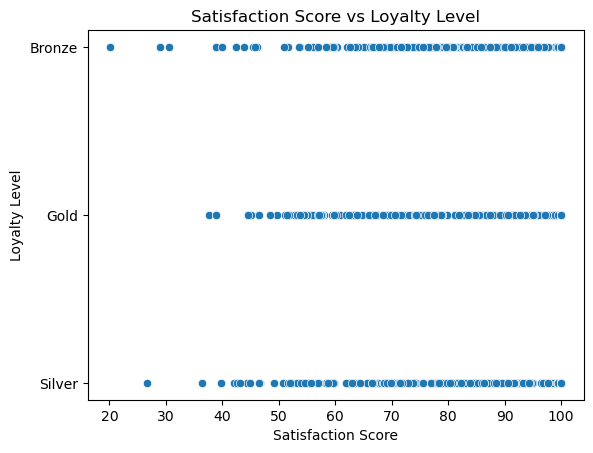

In [3]:
# Plotting Satisfaction Score vs Loyalty Level
import seaborn as sns
sns.scatterplot(x=data['SatisfactionScore'], y=data['LoyaltyLevel'])
plt.title("Satisfaction Score vs Loyalty Level")
plt.xlabel("Satisfaction Score")
plt.ylabel("Loyalty Level")
plt.show()

## Select the features

c:\Users\sanikj\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\sanikj\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


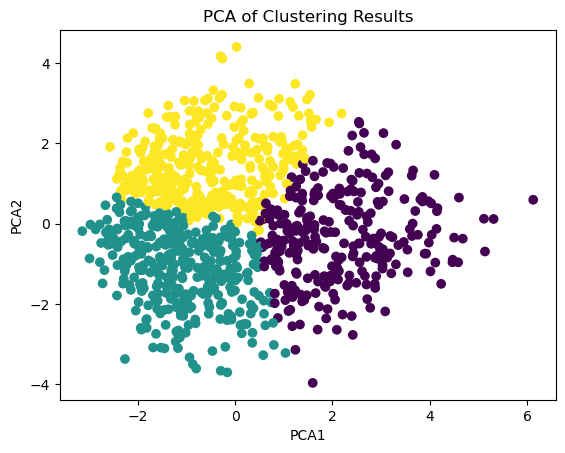

In [7]:

# Perform PCA for dimensionality reduction
from sklearn.decomposition import PCA

# Selecting only numeric features for scaling
numeric_features = data.select_dtypes(include=[np.number])

# Standardizing the numeric features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_features)

# Apply PCA
pca = PCA(n_components=2)  # Reducing to 2 dimensions for visualization
pca_data = pca.fit_transform(scaled_data)

# Adding PCA results to the dataset
data['PCA1'] = pca_data[:, 0]
data['PCA2'] = pca_data[:, 1]

# Ensure 'Cluster_Optimized' column exists
if 'Cluster_Optimized' not in data.columns:
	optimal_clusters = 3
	kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
	kmeans.fit(scaled_data)
	data['Cluster_Optimized'] = kmeans.labels_

# Plotting the PCA results
plt.scatter(data['PCA1'], data['PCA2'], c=data['Cluster_Optimized'], cmap='viridis')
plt.title("PCA of Clustering Results")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()



In [8]:
# Use reduced_data for clustering
# Selecting features for clustering
features = data[['SatisfactionScore', 'ServiceQuality']]
features.head()

,SatisfactionScore,ServiceQuality
0,100.0,8
1,100.0,2
2,100.0,10
3,100.0,10
4,82.0,4


## Clustering analysis

In [9]:
# Performing clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(features)

# Adding the cluster labels to the dataset
data['Cluster'] = kmeans.labels_
data.head()

c:\Users\sanikj\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\sanikj\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


,CustomerID,Age,Gender,Country,Income,ProductQuality,ServiceQuality,PurchaseFrequency,FeedbackScore,LoyaltyLevel,SatisfactionScore,PCA1,PCA2,Cluster_Optimized,Cluster
0,1,56,Male,UK,83094,5,8,5,Low,Bronze,100.0,-1.578010,-1.510623,1,0
1,2,69,Male,UK,86860,10,2,8,Medium,Gold,100.0,-1.543073,0.533795,2,0
2,3,46,Female,USA,60173,8,10,18,Medium,Silver,100.0,-2.265611,-1.189100,1,0
3,4,32,Female,UK,73884,7,10,16,Low,Gold,100.0,-1.968747,-0.640700,1,0
4,5,60,Male,UK,97546,6,4,13,Low,Bronze,82.0,-0.305324,-0.925624,1,1


## Clustering results

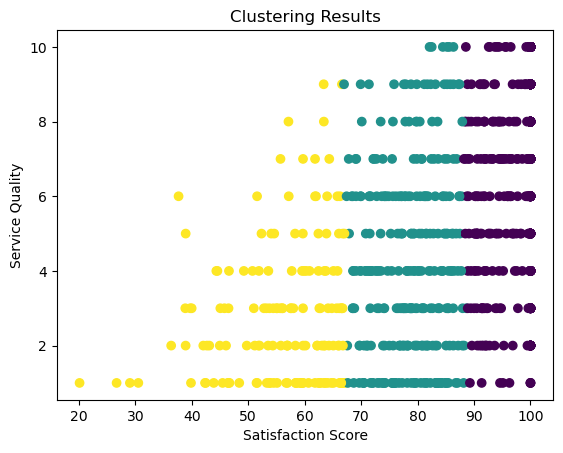

In [10]:
# Plotting the clustering results
plt.scatter(features['SatisfactionScore'], features['ServiceQuality'], c=data['Cluster'], cmap='viridis')
plt.title("Clustering Results")
plt.xlabel("Satisfaction Score")
plt.ylabel("Service Quality")
plt.show()

## Standardize the variables

In [11]:
# Standardizing the variables
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

features_scaled[:5]

array([[ 0.85020121,  0.84372908],
       [ 0.85020121, -1.22333901],
       [ 0.85020121,  1.53275178],
       [ 0.85020121,  1.53275178],
       [-0.26630735, -0.53431631]])

## Use the Elbow method

c:\Users\sanikj\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\sanikj\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\sanikj\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\sanikj\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

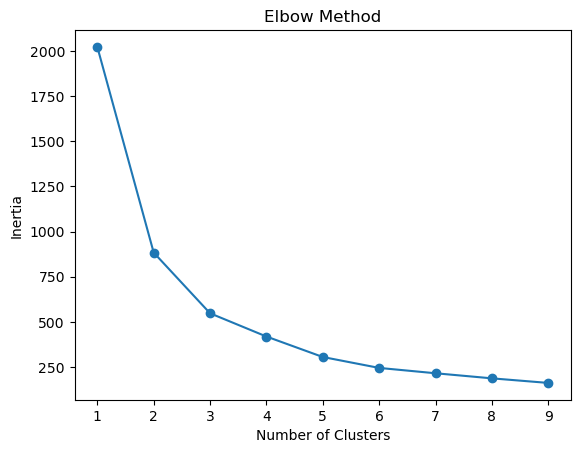

In [12]:
# Using the Elbow Method to find the optimal number of clusters
inertia = []
range_n_clusters = range(1, 10)

for n in range_n_clusters:
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range_n_clusters, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

## Explore clustering solutions and select the number of clusters

c:\Users\sanikj\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\sanikj\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


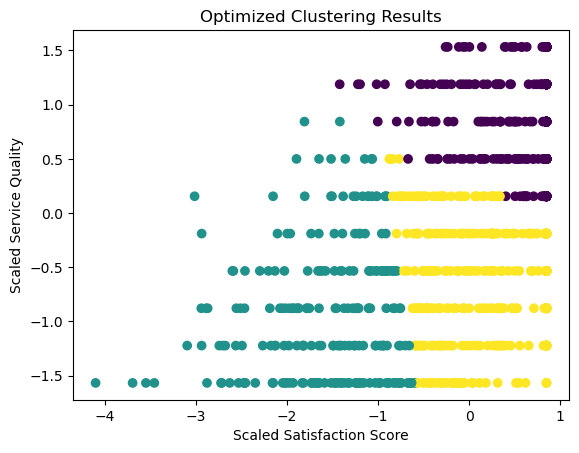

In [13]:
# Final clustering with the optimal number of clusters (e.g., 3 from the Elbow Method)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(features_scaled)

# Adding the cluster labels to the dataset
data['Cluster_Optimized'] = kmeans.labels_

# Visualizing the final clustering solution
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=data['Cluster_Optimized'], cmap='viridis')
plt.title("Optimized Clustering Results")
plt.xlabel("Scaled Satisfaction Score")
plt.ylabel("Scaled Service Quality")
plt.show()